In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to read the datafile 
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv") 
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# To get the first five rows of the dataframe 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Checking the number of rows and columns in the dataset respectively
df.shape

(25, 2)

In [6]:
# Checking if there are any null values present in the dataset.Apparently,We see there are no null values present.
df.isnull().transpose()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Hours,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Scores,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


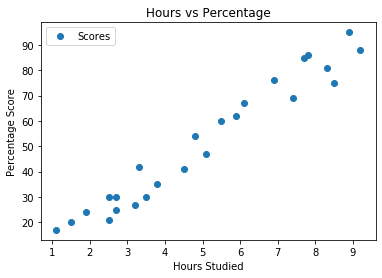

In [7]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

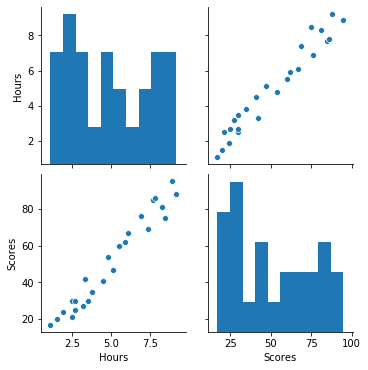

In [10]:
#To show pairwise relationships in a dataset
sns.pairplot(df)

In [11]:
# X and y arrays 
X = df['Hours'] 
Y = df['Scores']

In [13]:
# To perform test-train split 
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=100)

In [15]:
#To find the first five rows of the training dataframe 
X_train.head()

19    7.4
23    6.9
21    4.8
6     9.2
12    4.5
Name: Hours, dtype: float64

In [16]:
#To find the first five rows of the training dataframe 
Y_train.head()

19    69
23    76
21    54
6     88
12    41
Name: Scores, dtype: int64

In [18]:
#To number of dimensions in the array
print(X_train.shape) 
print(X_test.shape)
print(Y_train.shape) 
print(Y_test.shape)

(20,)
(5,)
(20,)
(5,)


In [19]:
a = pd.DataFrame(X_train)
b = a.values.reshape(-1,1) 
X_train= pd.DataFrame(b) 
a = pd.DataFrame(X_test) 
b = a.values.reshape(-1,1) 
X_test= pd.DataFrame(b) 
print(X_test) 
print(X_train) 
print(Y_test) 
print(Y_train)

     0
0  2.7
1  3.8
2  3.3
3  5.9
4  1.5
      0
0   7.4
1   6.9
2   4.8
3   9.2
4   4.5
5   3.5
6   7.8
7   2.5
8   5.1
9   2.7
10  1.1
11  1.9
12  6.1
13  3.2
14  7.7
15  2.5
16  8.9
17  5.5
18  8.5
19  8.3
9     25
22    35
13    42
11    62
5     20
Name: Scores, dtype: int64
19    69
23    76
21    54
6     88
12    41
4     30
24    86
0     21
1     47
20    30
14    17
17    24
18    67
2     27
10    85
16    30
15    95
7     60
3     75
8     81
Name: Scores, dtype: int64


In [20]:
# To perform Linear Regression 
from sklearn.linear_model import LinearRegression 
lr = LinearRegression() 
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# To print the intercept and the coefficient 
print(lr.intercept_) 
print(lr.coef_)

1.9894231109746912
[9.83544438]


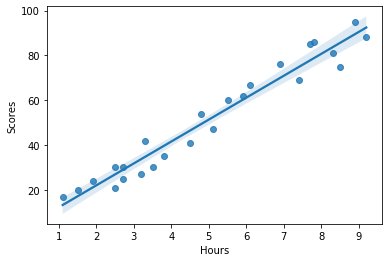

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [22]:
#To plot regression plot 
sns.regplot(X,Y)
plt.show()
print(df.corr())

In [23]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

     0
0  2.7
1  3.8
2  3.3
3  5.9
4  1.5


In [29]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


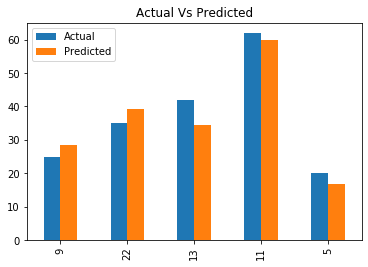

In [30]:
df.plot(kind='bar')
plt.title("Actual Vs Predicted")
plt.show()

In [34]:
# To find the Mean Absolute Error, Mean Squared Error 
from sklearn import metrics as m
print('Mean Absolute Error:', 
      m.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 4.140342096254413


In [35]:
#What will be predicted score if a student studies for 9.25 hrs/ day?
hours=[[9.25]]
pred_score=lr.predict(hours)
print("Predicted Score is",pred_score)

Predicted Score is [92.96728365]
